# 动量策略-- Momentum

## 动量效应是指在一定时期内，如果某股票或者某股票投资组合在前一段时间表现较好（差），那么，下一段时间该股票或者股票投资组合仍将有良好（较差）的表现；时间迟滞；多久算过去？策略核心

In [3]:
import numpy as np
import pandas as pd 
import tushare as ts

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings;warnings.simplefilter('ignore')

In [4]:
data = ts.get_k_data('hs300', '2017-01-01', '2019-05-20')[['date','close']]

In [5]:
data = pd.DataFrame(data)      #tushare调过来本来就是dataframe

In [6]:
data.set_index('date', inplace=True)

In [7]:
data.head(10)

,close
date,
2017-01-03,3342.23
2017-01-04,3368.31
2017-01-05,3367.79
2017-01-06,3347.67
2017-01-09,3363.90
2017-01-10,3358.27
2017-01-11,3334.50
2017-01-12,3317.62
2017-01-13,3319.91


In [8]:
data.rename(columns={'close':'price'}, inplace=True)

In [10]:
data['return'] = np.log(data['price']/data['price'].shift(1))

In [11]:
data['position'] = np.sign(data['return'])    #计算交易信号

In [12]:
data.head(50)

,price,return,position
date,,,
2017-01-03,3342.23,NaN,NaN
2017-01-04,3368.31,0.007773,1.0
2017-01-05,3367.79,-0.000154,-1.0
2017-01-06,3347.67,-0.005992,-1.0
2017-01-09,3363.90,0.004836,1.0
2017-01-10,3358.27,-0.001675,-1.0
2017-01-11,3334.50,-0.007103,-1.0
2017-01-12,3317.62,-0.005075,-1.0
2017-01-13,3319.91,0.000690,1.0


In [15]:
data['strategy'] = data['position'].shift(1) * data['return']

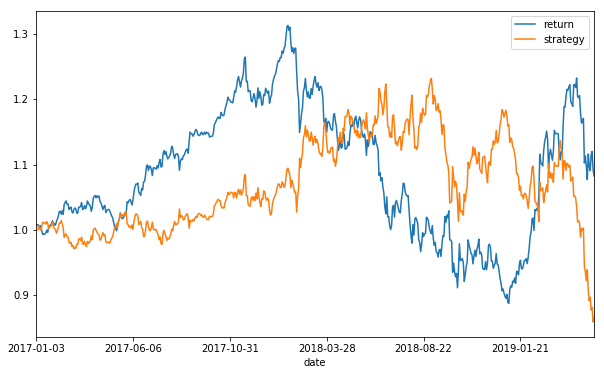

In [20]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

过于频繁开仓交易

## 策略优化--将1天收益变为时间段收益，有点类似滑动平均

In [21]:
data['position_5'] = np.sign(data['return'].rolling(5).mean())

In [22]:
data['strategy_5'] = data['position_5'].shift(1)*data['return']

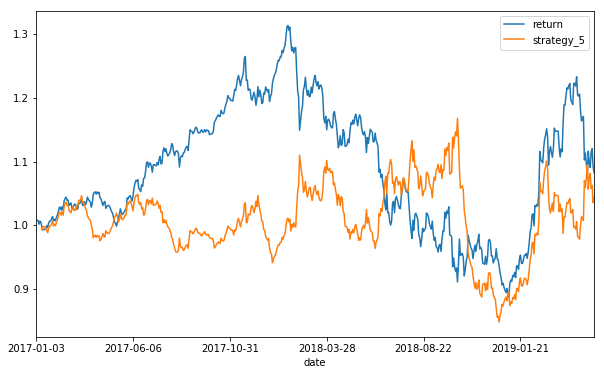

In [23]:
data[['return','strategy_5']].cumsum().apply(np.exp).plot(figsize=(10,6))     #单纯从收益看其实没有1天的高，但是交易次数变少了

In [27]:
data['position'].value_counts()

 1.0    298
-1.0    278
Name: position, dtype: int64

In [28]:
data['position_5'].value_counts()

 1.0    317
-1.0    255
Name: position_5, dtype: int64

In [29]:
data.head(50)

,price,return,position,strategy,position_5,strategy_5
date,,,,,,
2017-01-03,3342.23,NaN,NaN,NaN,NaN,NaN
2017-01-04,3368.31,0.007773,1.0,NaN,NaN,NaN
2017-01-05,3367.79,-0.000154,-1.0,-0.000154,NaN,NaN
2017-01-06,3347.67,-0.005992,-1.0,0.005992,NaN,NaN
2017-01-09,3363.90,0.004836,1.0,-0.004836,NaN,NaN
2017-01-10,3358.27,-0.001675,-1.0,-0.001675,1.0,NaN
2017-01-11,3334.50,-0.007103,-1.0,0.007103,-1.0,-0.007103
2017-01-12,3317.62,-0.005075,-1.0,0.005075,-1.0,0.005075
2017-01-13,3319.91,0.000690,1.0,-0.000690,-1.0,-0.000690


## 参数寻优 -- 使用离散return计算方法

In [30]:
data['return_dis'] = data['price']/data['price'].shift(1)-1     #计算离散收益
# data['return_dis] = data['price]/data['price'].pct_change()

In [31]:
data['return_dis_cum'] = (data['return_dis']+1).cumprod()    #累计乘积
data.head(10)

,price,return,position,strategy,position_5,strategy_5,return_dis,return_dis_cum
date,,,,,,,,
2017-01-03,3342.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,3368.31,0.007773,1.0,NaN,NaN,NaN,0.007803,1.007803
2017-01-05,3367.79,-0.000154,-1.0,-0.000154,NaN,NaN,-0.000154,1.007648
2017-01-06,3347.67,-0.005992,-1.0,0.005992,NaN,NaN,-0.005974,1.001628
2017-01-09,3363.90,0.004836,1.0,-0.004836,NaN,NaN,0.004848,1.006484
2017-01-10,3358.27,-0.001675,-1.0,-0.001675,1.0,NaN,-0.001674,1.004799
2017-01-11,3334.50,-0.007103,-1.0,0.007103,-1.0,-0.007103,-0.007078,0.997687
2017-01-12,3317.62,-0.005075,-1.0,0.005075,-1.0,0.005075,-0.005062,0.992637
2017-01-13,3319.91,0.000690,1.0,-0.000690,-1.0,-0.000690,0.000690,0.993322


In [48]:
price_plot = ['return_dis_cum']
type(price_plot)

list

In [49]:
for days in [10, 20, 30, 60]:
#     data['position_%d' %days] = np.sign(data['return'].rolling(days).mean())
    price_plot.append('sty_cumr_%dd' %days)
    data['position_%dd' %days] = np.where(data['return'].rolling(days).mean()>0, 1,-1)
    data['strategy_%dd' %days] = data['position_%dd' %days].shift(1) * data['return']
    data['sty_cumr_%dd' %days] = (data['strategy_%dd' %days]+1).cumprod()

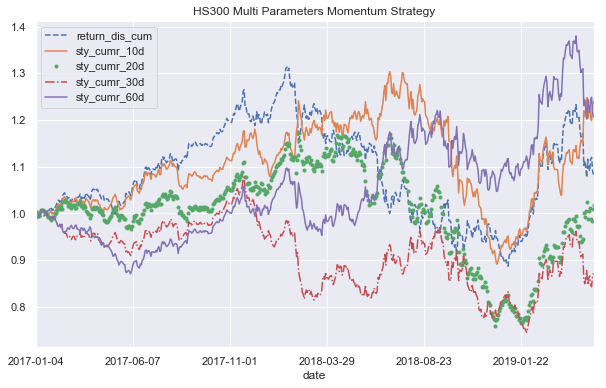

In [50]:
sns.set()
data[price_plot].dropna().plot(
    title='HS300 Multi Parameters Momentum Strategy',
    figsize=(10,6), style=['--','-','.','-.','-'])

## 策略优化使用高频数据--high frequency data

In [22]:
hs300_hf = ts.get_k_data('hs300',ktype='5')

In [23]:
hs300_hf.set_index('date', inplace=True)

In [24]:
hs300_hf.index =pd.to_datetime( hs300_hf.index)

In [25]:
hs300_hf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 482 entries, 2019-05-17 14:55:00 to 2019-05-31 15:00:00
Data columns (total 8 columns):
open             482 non-null float64
close            482 non-null float64
high             482 non-null float64
low              482 non-null float64
volume           482 non-null float64
amount           482 non-null object
turnoverratio    482 non-null object
code             482 non-null object
dtypes: float64(5), object(3)
memory usage: 33.9+ KB


In [19]:
# hs300_hf = hs300_hf['2019-05-18':'2019-05-31']   #取10个交易日的数据

In [26]:
hs300_hf['return'] = np.log(hs300_hf['close']/hs300_hf['close'].shift(1))

In [27]:
hs300_hf['position'] = np.sign(hs300_hf['return'].rolling(10).mean())   #10个5分钟的平均

In [28]:
hs300_hf['strategy'] = hs300_hf['position'].shift(1)*hs300_hf['return']

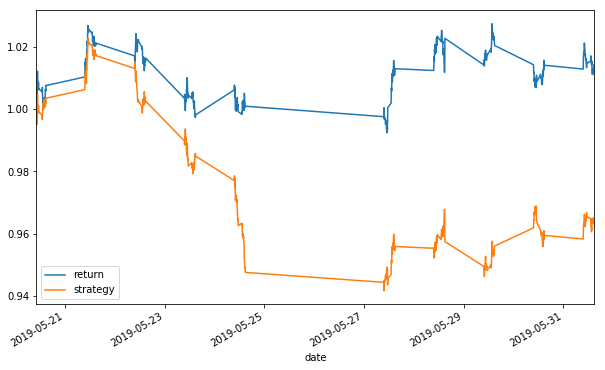

In [31]:
hs300_hf[['return','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))